In [ ]:
import numpy as np
import pandas as pd
import random
import csv
import cv2
import matplotlib.pyplot as plt

from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

##### Seperating Test Data Images :
- Generating 20% test data image_names
- Storing names in CSV file `testfor{obj_name}ORB.csv`

In [ ]:
randomlist_gun = random.sample(range(0, 800), 160)
print(randomlist_gun)
randomlist_knife = random.sample(range(0, 880), 160)
print(randomlist_knife)

[247, 152, 790, 299, 494, 758, 10, 697, 471, 145, 523, 381, 336, 51, 427, 276, 397, 573, 699, 520, 79, 566, 559, 189, 432, 500, 388, 498, 193, 205, 521, 743, 446, 775, 162, 764, 780, 522, 35, 685, 313, 729, 665, 674, 31, 680, 119, 175, 736, 453, 230, 549, 458, 249, 542, 603, 576, 712, 627, 715, 625, 610, 561, 120, 283, 623, 353, 785, 507, 104, 325, 742, 700, 716, 553, 0, 772, 52, 96, 181, 643, 488, 540, 231, 222, 719, 71, 257, 466, 297, 348, 2, 392, 761, 658, 138, 694, 346, 345, 243, 61, 754, 169, 332, 281, 414, 109, 541, 771, 384, 614, 428, 41, 207, 449, 338, 450, 279, 65, 54, 551, 667, 569, 214, 98, 796, 441, 664, 478, 537, 580, 461, 402, 445, 3, 708, 496, 298, 263, 595, 285, 420, 63, 464, 182, 476, 113, 532, 27, 720, 369, 631, 649, 677, 798, 647, 351, 791, 114, 718]
[793, 263, 114, 517, 792, 755, 19, 836, 337, 593, 461, 571, 315, 533, 745, 703, 261, 135, 202, 572, 791, 215, 496, 199, 227, 854, 363, 839, 289, 330, 85, 72, 335, 742, 96, 589, 259, 879, 197, 375, 735, 660, 675, 361, 575

In [ ]:
with open(f'/content/drive/My Drive/results/testforgunSIFT.csv','w') as f:
  W = csv.writer(f)
  W.writerow(randomlist_gun)

with open(f'/content/drive/My Drive/results/testforknifeSIFT.csv','w') as f:
  W = csv.writer(f)
  W.writerow(randomlist_knife)

##### Making Training Data with remaining images with unique features

In [ ]:
superset_traing = pd.read_csv(f'/content/drive/My Drive/results/features_gun_2_SIFT/1.csv',header = None).values
superset_traing = superset_traing.astype(np.uint8)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)
for i in range(1,800):
  if i not in randomlist_gun:
    ft = pd.read_csv(f'/content/drive/My Drive/results/features_gun_2_SIFT/{i}.csv',header = None).values
    ft = ft.astype(np.uint8)
    matches = bf.match(ft,superset_traing)
    x=[0 for x in range(len(matches))]
    for i in range(len(matches)) :
      x[i]=matches[i].queryIdx
    s=np.append(ft,superset_traing,0)
    superset_traing=np.delete(s,[x],0)

KeyboardInterrupt: ignored

In [ ]:
import sys
def counter(i):
    '''
    Counting in Loop and printing count dynamically
    E.g. :
        >>> 1
        >>> 2
    '''
    sys.stdout.write(f'\r{i}')
    sys.stdout.flush()


In [ ]:
with open('/content/drive/My Drive/results/supersetforgun_SIFT ','w') as s:
    W = csv.writer(s)
    for row in superset_traing:
        W.writerow(row)

In [ ]:
count_gun = np.array
for i in range(1,800):
  if i not in randomlist_gun:
    ft = pd.read_csv(f'/content/drive/My Drive/results/features_gun_2_SIFT/{i}.csv',header = None).values
    count_gun = np.append(count_gun,len(ft))
    counter(i)
  

799

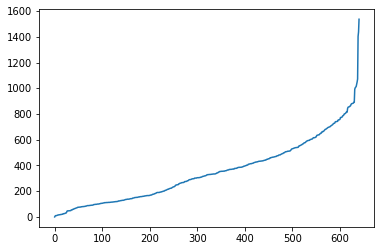

In [ ]:
count_gun[0] = 0
count_gun.sort()
plt.plot(count_gun)

301302
411412
413414
419420
421422
424425
426427
432433
434435
437438
439440
444446
446448
502503
504505
510511
512513
515518
523524
525526
530531
537539
568569
569570
581583
610611
668669
705706
732734
736738
738739
739740
741743
743744
754756
756757
784785
824825
825826
838840
867868
880

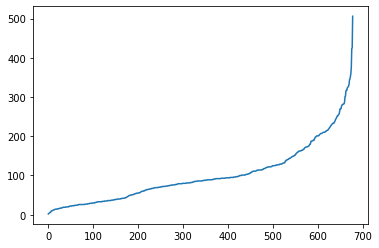

In [ ]:
count_knife =[]
for i in range(1,881):
  if i not in randomlist_knife:
    try:
      ft = pd.read_csv(f'/content/drive/My Drive/results/features_knife_SIFT/{i}.csv',header = None).values
      count_knife = np.append(count_knife,len(ft))
    except:
      print(i)
    counter(i)
count_knife.sort()
plt.plot(count_knife)

In [ ]:
more_knife = []
less_knife = []
morek = pd.read_csv(f'/content/drive/My Drive/results/features_knife_SIFT/1.csv',header = None).values
lessk = pd.read_csv(f'/content/drive/My Drive/results/features_knife_SIFT/1.csv',header = None).values
for i in range(1,881):
  if i not in randomlist_knife:
    counter(i)
    try:
      ft = pd.read_csv(f'/content/drive/My Drive/results/features_knife_SIFT/{i}.csv',header = None).values
      count_knife = len(ft)
      if count_knife >150:
        more_knife = np.append(more_knife,i)
        morek = np.append(morek,ft,0)
      else:
        less_knife = np.append(less_knife,i)
        lessk = np.append(lessk,ft,0)
    #print(count_knife[i])
    except:
      print(i)

In [ ]:
more_gun = []
less_gun = []
moreg = pd.read_csv(f'/content/drive/My Drive/results/features_gun_2_SIFT/1.csv',header = None).values
lessg = pd.read_csv(f'/content/drive/My Drive/results/features_gun_2_SIFT/1.csv',header = None).values
for i in range(1,800):
  if i not in randomlist_gun:

    try:
      counter(i)
      ft = pd.read_csv(f'/content/drive/My Drive/results/features_gun_2_SIFT/{i}.csv',header = None).values
      count_gun = len(ft)
      if count_gun >400:
        more_gun = np.append(more_gun,i)
        moreg = np.append(moreg,ft,0)
      else:
        less_gun = np.append(less_gun,i)
        lessg = np.append(lessg,ft,0)
    #print(count_knife[i])
    except:
    #   print(i)

799

In [ ]:
print(len(more_gun))
print(len(less_gun))
print(len(more_knife))
print(len(less_knife))
print(moreg.shape)
print(lessg.shape)
print(morek.shape)
print(lessk.shape)

237
403
131
548
(145260, 128)
(80748, 128)
(29726, 128)
(39068, 128)


In [ ]:
superset_trainmg = pd.read_csv(f'/content/drive/My Drive/results/features_gun_2_SIFT/1.csv',header = None).values
superset_trainmg = superset_trainmg.astype(np.uint8)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)
for i in more_gun :
  if i >0:
    counter(i)
    ft = pd.read_csv(f'/content/drive/My Drive/results/features_gun_2_SIFT/{int(i)}.csv',header = None).values
    ft = ft.astype(np.uint8)
    matches = bf.match(ft,superset_trainmg)
    x=[0 for x in range(len(matches))]
    for i in range(len(matches)) :
      x[i]=matches[i].queryIdx
    s=np.append(ft,superset_trainmg,0)
    superset_trainmg=np.delete(s,[x],0)

118.0

KeyboardInterrupt: ignored

In [ ]:
with open('/content/drive/My Drive/results/smg_SIFT.csv ','w') as s:
    W = csv.writer(s)
    for row in superset_trainmg:
        W.writerow(row)

In [ ]:
s = pd.read_csv('/content/drive/MyDrive/results/smg_SIFT.csv ',header = None).values


In [ ]:
superset_trainlg = pd.read_csv(f'/content/drive/My Drive/results/features_gun_2_SIFT/1.csv',header = None).values
superset_trainlg = superset_trainlg.astype(np.uint8)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)
for i in less_gun :
  if i >0:
    counter(i)
    ft = pd.read_csv(f'/content/drive/My Drive/results/features_gun_2_SIFT/{int(i)}.csv',header = None).values
    ft = ft.astype(np.uint8)
    # print(len(ft))
    matches = bf.match(ft,superset_trainlg)
    x=[0 for x in range(len(matches))]
    for i in range(len(matches)) :
      x[i]=matches[i].queryIdx
    
    s=np.append(ft,superset_trainlg,0)
    superset_trainlg=np.delete(s,[x],0)
    # print(len(superset_trainlg))
print(superset_trainlg.shape)
with open('/content/drive/My Drive/results/slg_SIFT.csv ','w') as s:
    W = csv.writer(s)
    for row in superset_trainlg:
        W.writerow(row)


799.0(47607, 128)


In [ ]:
superset_trainlk = pd.read_csv(f'/content/drive/My Drive/results/features_knife_SIFT/1.csv',header = None).values
superset_trainlk = superset_trainlk.astype(np.uint8)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)
for i in less_knife :
  if i >0:
    ft = pd.read_csv(f'/content/drive/My Drive/results/features_knife_SIFT/{int(i)}.csv',header = None).values
    ft = ft.astype(np.uint8)
    # print(len(ft))
    matches = bf.match(ft,superset_trainlk)
    x=[0 for x in range(len(matches))]
    for i in range(len(matches)) :
      x[i]=matches[i].queryIdx
    
    s=np.append(ft,superset_trainlk,0)
    superset_trainlk=np.delete(s,[x],0)
    # print(len(superset_trainlk))
    counter(i)

print(superset_trainlk.shape)

with open('/content/drive/My Drive/results/slk_SIFT.csv ','w') as s:
    W = csv.writer(s)
    for row in superset_trainlk:
        W.writerow(row)

32(10028, 128)


In [ ]:
superset_trainmk = pd.read_csv(f'/content/drive/My Drive/results/features_knife_SIFT/1.csv',header = None).values
superset_trainmk = superset_trainmk.astype(np.uint8)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)
for i in more_knife :
  if i >0:
    counter(i)
    ft = pd.read_csv(f'/content/drive/My Drive/results/features_knife_SIFT/{int(i)}.csv',header = None).values
    ft = ft.astype(np.uint8)
    matches = bf.match(ft,superset_trainmk)
    x=[0 for x in range(len(matches))]
    for i in range(len(matches)) :
      x[i]=matches[i].queryIdx
    s=np.append(ft,superset_trainmk,0)
    superset_trainmk=np.delete(s,[x],0)
print(superset_trainmk.shape)
with open('/content/drive/My Drive/results/smk_SIFT.csv ','w') as s:
    W = csv.writer(s)
    for row in superset_trainmk:
        W.writerow(row)

753.0(13236, 128)
